<a href="https://colab.research.google.com/github/Monisha09-ds/-/blob/main/timeserieswith(XGBOOST).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install fbprophet
# from fbprophet import Prophet

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv('/content/Totals.csv')

In [ ]:
data.head()

,Date,Your estimated revenue (INR)
0,2021-07-04,112.582
1,2021-07-05,108.838
2,2021-07-06,113.913
3,2021-07-07,82.466
4,2021-07-08,118.559


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          364 non-null    object 
 1   Your estimated revenue (INR)  364 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [ ]:
data.tail()

,Date,Your estimated revenue (INR)
359,2022-06-28,1204.034
360,2022-06-29,1095.097
361,2022-06-30,993.429
362,2022-07-01,738.893
363,2022-07-02,918.778


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])

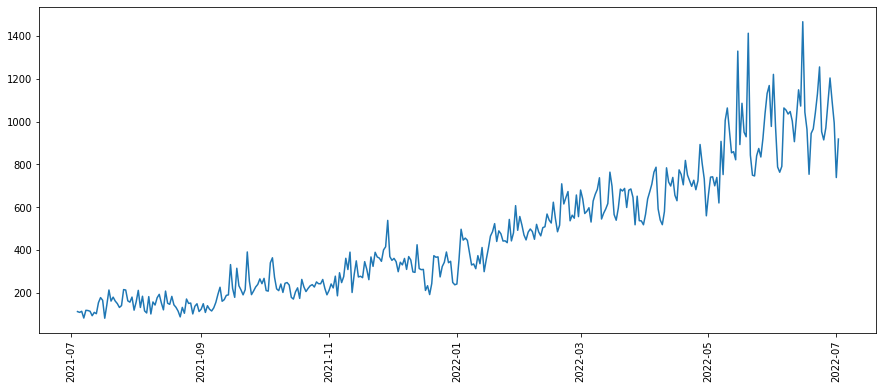

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.plot(data['Date'],data['Your estimated revenue (INR)'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
m = Prophet()
data.columns = ['ds','y']

In [ ]:
model = m.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=1000,freq='D')
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1359,2025-03-24,5366.097206,4394.158563,6335.810775,4401.431766,6317.626317,17.367028,17.367028,17.367028,17.367028,17.367028,17.367028,0.0,0.0,0.0,5383.464234
1360,2025-03-25,5370.405829,4423.955003,6338.109677,4404.059925,6322.950609,23.464082,23.464082,23.464082,23.464082,23.464082,23.464082,0.0,0.0,0.0,5393.869911
1361,2025-03-26,5374.714453,4444.342928,6349.789215,4406.507216,6328.274900,34.438606,34.438606,34.438606,34.438606,34.438606,34.438606,0.0,0.0,0.0,5409.153058
1362,2025-03-27,5379.023076,4396.480503,6324.769566,4409.015243,6333.599192,3.831921,3.831921,3.831921,3.831921,3.831921,3.831921,0.0,0.0,0.0,5382.854997
1363,2025-03-28,5383.331700,4362.324520,6309.562217,4411.786449,6338.922066,-29.960461,-29.960461,-29.960461,-29.960461,-29.960461,-29.960461,0.0,0.0,0.0,5353.371239


In [ ]:
forecast['subs_lower'] = forecast['yhat'].cumsum()

In [ ]:
forecast = forecast[['ds','yhat_lower']]

In [ ]:
final = forecast[(forecast['ds'] > '2022-06-30') & (forecast['ds'] < '2023-01-01')][['ds','yhat_lower']]

In [ ]:
final['month'] = final['ds'].dt.month_name()

In [ ]:
print(final['yhat_lower'].sum())
final.groupby('month').sum().sort_values('yhat_lower')

248357.6093228885


,yhat_lower
month,
July,31739.511716
August,36026.131918
September,38623.408684
October,43933.761812
November,46407.479197
December,51627.315996


In [ ]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
import pandas as pd
# Generate a date range of monthly intervals for the year 2023
date_range = pd.date_range(start='2023-01-01', end='2023-12-31', freq='T')

print(date_range)


DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 00:01:00',
               '2023-01-01 00:02:00', '2023-01-01 00:03:00',
               '2023-01-01 00:04:00', '2023-01-01 00:05:00',
               '2023-01-01 00:06:00', '2023-01-01 00:07:00',
               '2023-01-01 00:08:00', '2023-01-01 00:09:00',
               ...
               '2023-12-30 23:51:00', '2023-12-30 23:52:00',
               '2023-12-30 23:53:00', '2023-12-30 23:54:00',
               '2023-12-30 23:55:00', '2023-12-30 23:56:00',
               '2023-12-30 23:57:00', '2023-12-30 23:58:00',
               '2023-12-30 23:59:00', '2023-12-31 00:00:00'],
              dtype='datetime64[ns]', length=524161, freq='T')


Time Series Forecasting with XGBOOST

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal= sns.color_palette()
plt.style.use('fivethirtyeight')

In [ ]:
df = pd.read_csv('/content/Main dataset.csv')


In [ ]:
df.shape

(249120, 2)

In [ ]:
df = df.set_index('Datetime')
df.index =pd.to_datetime(df.index)

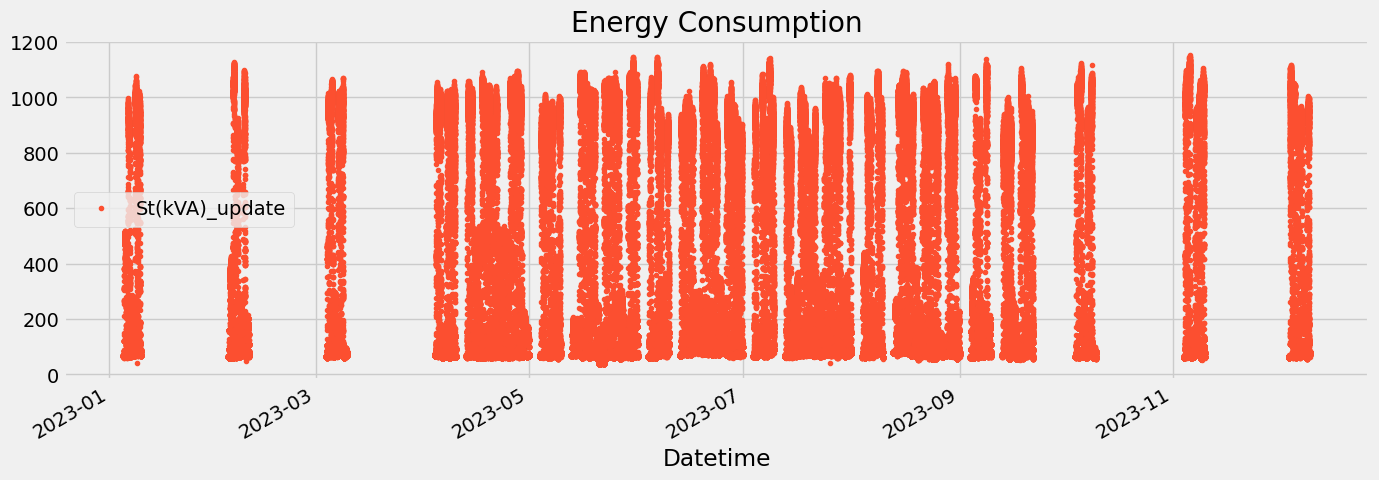

In [ ]:
df.plot(style='.',
        figsize=(15,5),
        color=color_pal[1],
        title="Energy Consumption")
plt.show()

In [ ]:
df.columns

Index(['St(kVA)_update'], dtype='object')

<Axes: ylabel='Frequency'>

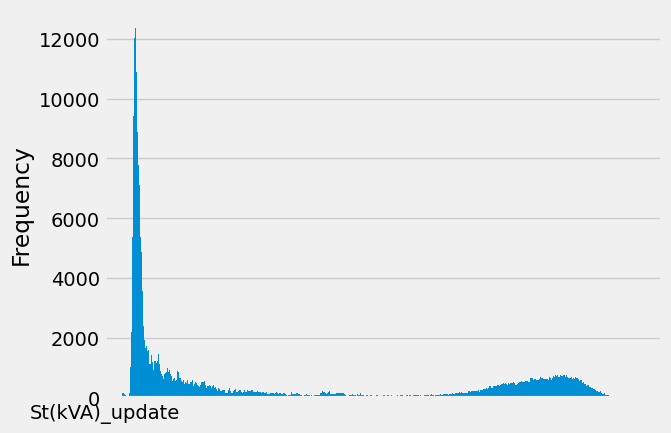

In [ ]:
df['St(kVA)_update'].plot(kind='box')
df['St(kVA)_update'].plot(kind='hist',bins=500)

Train/Test split

In [ ]:
df.head()

,St(kVA)_update
Datetime,
2023-02-04 00:00:00,62.3632
2023-02-04 00:01:00,61.7152
2023-02-04 00:02:00,61.6672
2023-02-04 00:03:00,61.4176
2023-02-04 00:04:00,61.5136


In [ ]:
df.tail()

,St(kVA)_update
Datetime,
2023-09-21 23:55:00,59.8048
2023-09-21 23:56:00,58.8208
2023-09-21 23:57:00,59.9440
2023-09-21 23:58:00,59.7280
2023-09-21 23:59:00,84.3808


In [ ]:
tr =df.loc[df.index <'2023-07-04 00:00:00	']
te = df.loc[df.index >='2023-07-04 00:00:00	']

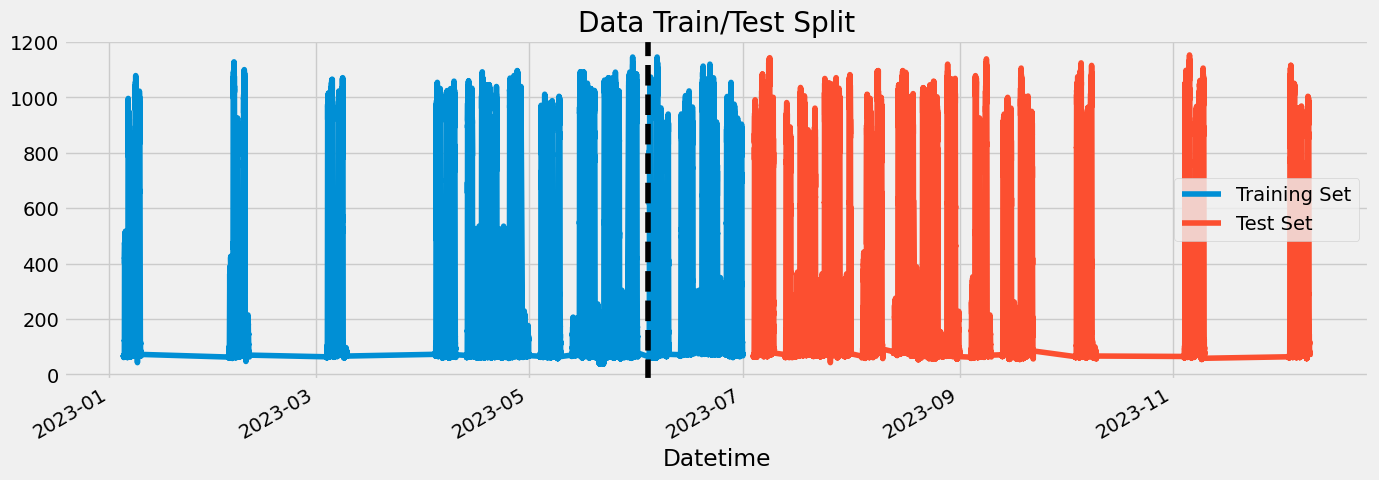

In [ ]:
fig ,ax =plt.subplots(figsize=(15,5))
tr.plot(ax=ax,label='Training Set',title='Data Train/Test Split')
te.plot(ax=ax,label='Test Set')
ax.axvline('2023-06-04 00:00:00	', color='black', ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

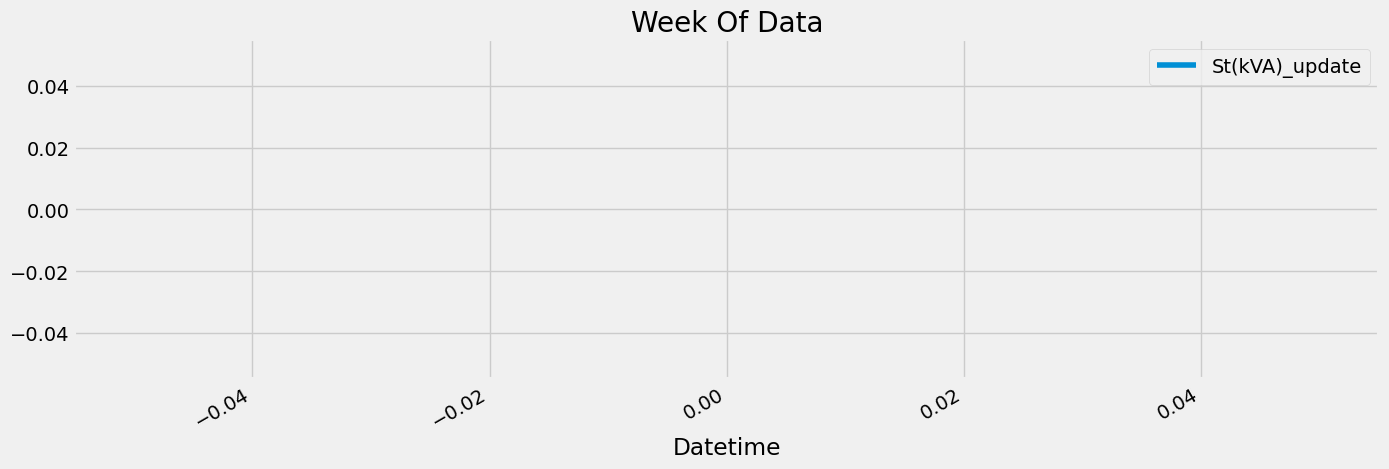

In [ ]:
df.loc[(df.index > '2023-07-04 00:00:00') & (df.index < '2023-07-04 00:00:00')] \
    .plot(figsize=(15, 5), title='Week Of Data')
plt.show()

In [ ]:
def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

df = create_features(df)

In [ ]:
df.columns

Index(['St(kVA)_update', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [ ]:
train =create_features(tr)
test = create_features(te)

features =['dayofyear','hour', 'dayofweek', 'quarter', 'month', 'year']
target = 'St(kVA)_update'

X_tr = train[features]
y_tr = train[target]
X_te = test[features]
y_te = test[target]





In [ ]:
print(X_tr.shape,'\n\n',X_te.shape,'\n\n',y_tr.shape,'\n',y_te.shape)

(129600, 6) 

 (119520, 6) 

 (129600,) 
 (119520,)


In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_tr, y_tr,
        eval_set=[(X_tr, y_tr), (X_te, y_te)],
        verbose=100)

[17:35:40] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:531.04301	validation_1-rmse:529.28645
[100]	validation_0-rmse:269.87998	validation_1-rmse:271.57482
[200]	validation_0-rmse:207.84879	validation_1-rmse:215.03254
[300]	validation_0-rmse:189.19526	validation_1-rmse:206.71565
[390]	validation_0-rmse:177.87522	validation_1-rmse:206.66362


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

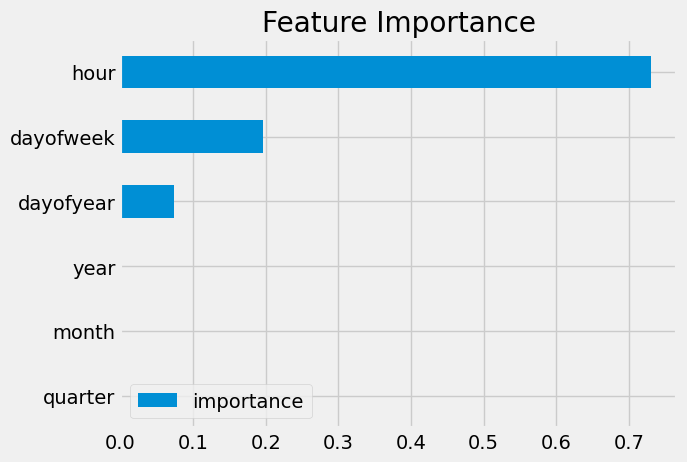

In [ ]:
fi = pd.DataFrame(data=reg.feature_importances_,
             index=reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [ ]:
te

,St(kVA)_update
Datetime,
2023-07-04 00:00:00,67.5232
2023-07-04 00:01:00,67.1712
2023-07-04 00:02:00,67.6512
2023-07-04 00:03:00,68.0352
2023-07-04 00:04:00,67.5488
...,...
2023-09-21 23:55:00,59.8048
2023-09-21 23:56:00,58.8208
2023-09-21 23:57:00,59.9440


In [ ]:
te['pred']=reg.predict(X_te)
df_2 =df.merge(te[['pred']],how='left',left_index=True,right_index=True)



<ipython-input-61-0c4a1d6d8bdd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  te['pred']=reg.predict(X_te)


In [ ]:
df_2.sample(10)

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,pred
Datetime,,,,,,,,,,
2023-10-05 08:59:00,1034.9008,8,3,4,10,2023,278,5,40,733.712097
2023-08-04 15:13:00,380.0528,15,4,3,8,2023,216,4,31,759.630676
2023-01-05 04:31:00,65.6624,4,3,1,1,2023,5,5,1,NaN
2023-07-15 15:04:00,204.3200,15,5,3,7,2023,196,15,28,467.675110
2023-04-30 14:46:00,140.3872,14,6,2,4,2023,120,30,17,NaN
2023-09-15 14:57:00,858.5184,14,4,3,9,2023,258,15,37,759.630676
2023-05-09 18:51:00,339.3136,18,1,2,5,2023,129,9,19,NaN
2023-12-07 18:33:00,411.4080,18,3,4,12,2023,341,7,49,332.242157
2023-12-08 01:22:00,76.8464,1,4,4,12,2023,342,8,49,75.642105


In [ ]:
df_2['pred']=df_2['pred'].fillna(df_2.pred.mean())

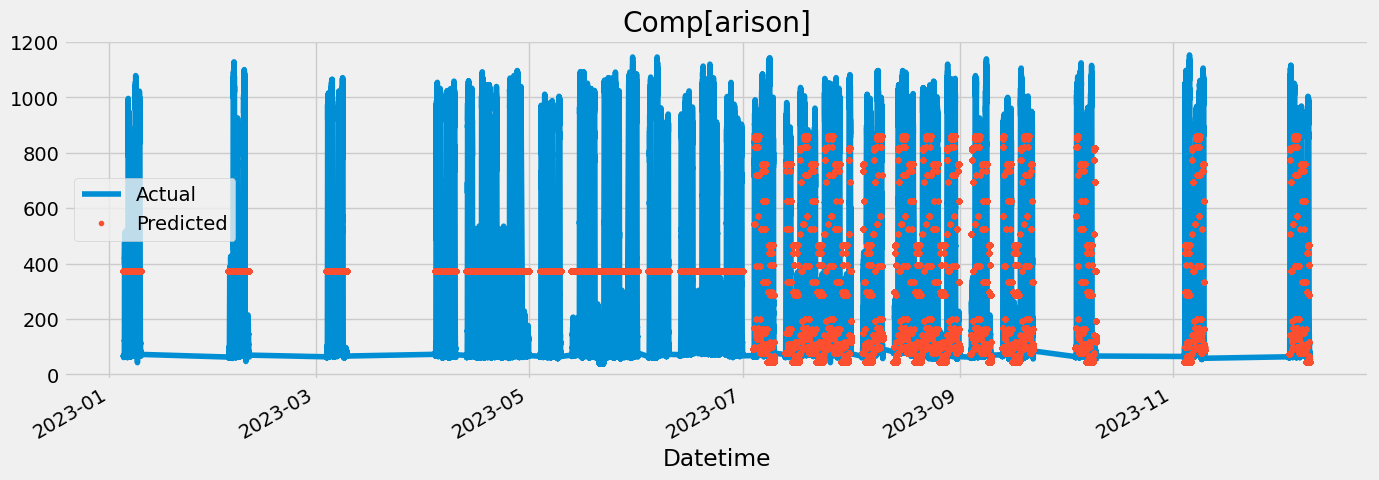

In [ ]:
ax = df_2[['St(kVA)_update']].plot(figsize=(15,5))
df_2['pred'].plot(ax=ax,style='.')
plt.legend(['Actual','Predicted'])
ax.set_title('Comp[arison]')
plt.show()

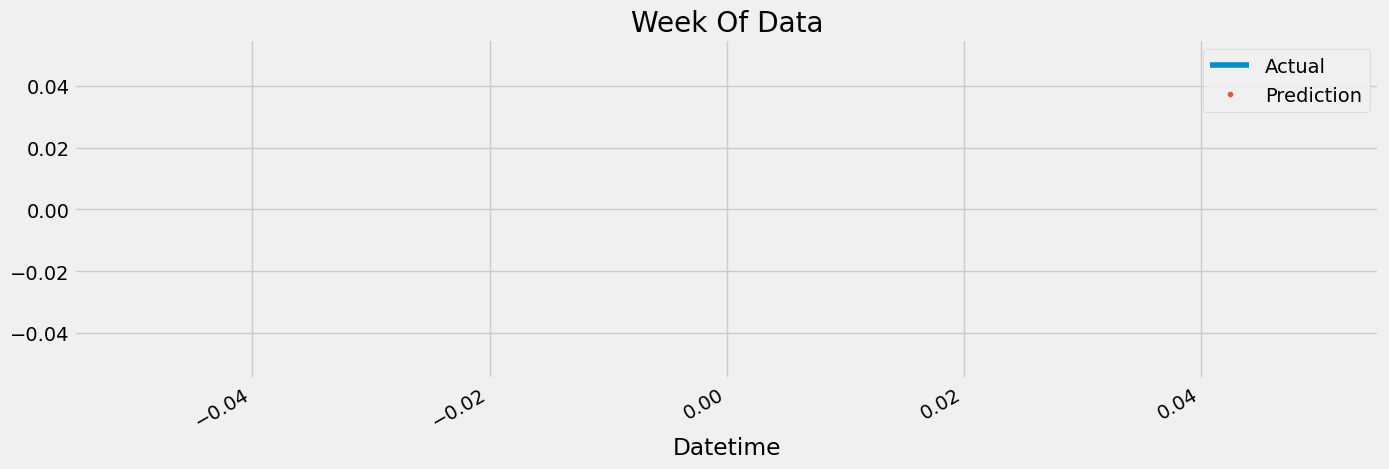

In [ ]:
ax = df_2.loc[(df_2.index > '2023-07-04 00:00:00') & (df_2.index < '2023-07-04 00:00:00')]['St(kVA)_update'] \
    .plot(figsize=(15, 5), title='Week Of Data')
df_2.loc[(df_2.index > '2023-07-04 00:00:00') & (df_2.index < '2023-07-04 00:00:00')]['pred'] \
    .plot(style='.')
plt.legend(['Actual','Prediction'])
plt.show()

In [ ]:
df_2.isnull().sum()

St(kVA)_update    0
hour              0
dayofweek         0
quarter           0
month             0
year              0
dayofyear         0
dayofmonth        0
weekofyear        0
pred              0
dtype: int64

In [ ]:
score = np.sqrt(mean_squared_error(df_2['St(kVA)_update'], df_2['pred']))
print(f'RMSE Score on Test set: {score:0.2f}')

RMSE Score on Test set: 307.89


In [ ]:
from sklearn.model_selection import TimeSeriesSplit

In [ ]:
tss = TimeSeriesSplit(n_splits = 5,test_size=(24*365*1),gap=24)
df_tss =df.sort_index()

In [ ]:
df_tss

,St(kVA)_update
Datetime,
2023-01-05 00:00:00,69.2096
2023-01-05 00:01:00,68.9792
2023-01-05 00:02:00,68.5136
2023-01-05 00:03:00,68.4032
2023-01-05 00:04:00,68.2016
...,...
2023-12-09 23:55:00,70.2880
2023-12-09 23:56:00,70.2880
2023-12-09 23:57:00,69.3216


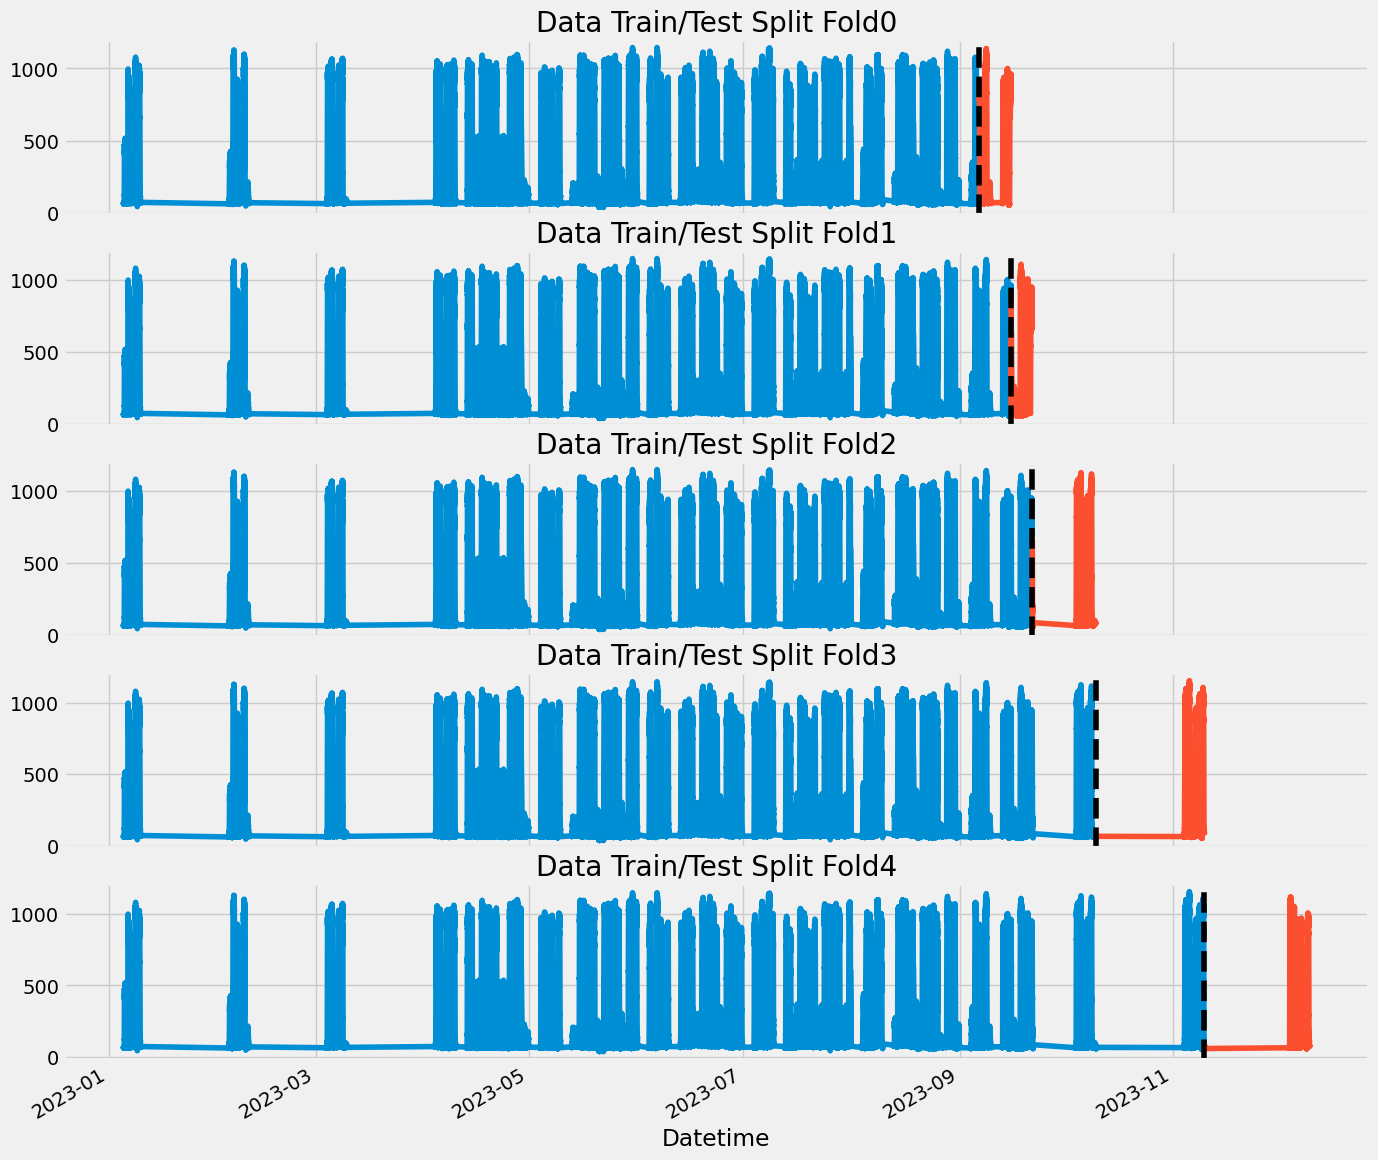

In [ ]:
fig,axs =plt.subplots(5,1,figsize=(15,15),sharex=True)
fold=0
for tr_idx,val_idx in tss.split(df_tss):
  tr =df_tss.iloc[tr_idx]
  te = df_tss.iloc[val_idx]
  tr['St(kVA)_update'].plot(ax=axs[fold],
                            label='Training Set',
                            title=f'Data Train/Test Split Fold{fold}')
  te['St(kVA)_update'].plot(ax=axs[fold],
                            label='Test Set',
                            title=f'Data Train/Test Split Fold{fold}')
  axs[fold].axvline(te.index.min(), color='black', ls='--')
  fold += 1
plt.show()


Forecasting Horizon:
The forecast horizon is the length of time into future for which forcasts are to be prepared .These generally  short time forecasting (less than 3 months)


In [ ]:
def create_future(df):
  df=df.copy()
  df['hour']=df.index.hour
  df['dayofweek']=df.index.dayofweek
  df['quarter']=df.index.quarter
  df['month']=df.index.month
  df['year']=df.index.year
  df['dayofyear']=df.index.dayofyear
  df['dayofmonth']=df.index.day
  df['weekofyear']=df.index.isocalendar().week
  return df

df =create_future(df)


LAg Features : What was the target days in past

In [ ]:
def add_lags(df):
    target_map = df['St(kVA)_update'].to_dict()
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

In [ ]:
df=add_lags(df)

In [ ]:
df.tail()

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,
2023-09-21 23:55:00,59.8048,23,3,3,9,2023,264,21,38,NaN,NaN,NaN
2023-09-21 23:56:00,58.8208,23,3,3,9,2023,264,21,38,NaN,NaN,NaN
2023-09-21 23:57:00,59.9440,23,3,3,9,2023,264,21,38,NaN,NaN,NaN
2023-09-21 23:58:00,59.7280,23,3,3,9,2023,264,21,38,NaN,NaN,NaN
2023-09-21 23:59:00,84.3808,23,3,3,9,2023,264,21,38,NaN,NaN,NaN


Train Using Cross Validation

In [ ]:
tss = TimeSeriesSplit(n_splits=5,test_size=(24*365*1),gap=24)
df=df.sort_index()

fold = 0
preds = []
scores = []

for tr_idx,val_idx in tss.split(df):
  tr = df.iloc[tr_idx]
  te = df.iloc[val_idx]

  tr = create_future(tr)
  te = create_future(te)

  features =  ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']

  target = 'St(kVA)_update'

  X_tr = tr[features]
  X_te = te[features]
  y_tr = tr[target]
  y_te = te[target]

reg = xgb.XGBRegressor(base_score =0.5,booster ='gbtree',n_estimators =1000,early_stopping_rounds =50,
                       objective='reg:linear',max_depth =3,learning_rate =0.01)

reg.fit(X_tr,y_tr,eval_set =[(X_tr,y_tr),(X_te,y_te)],verbose=100)

y_pred = reg.predict(X_te)
preds.append(y_pred)
score = np.sqrt(mean_squared_error(y_te,y_pred))
scores.append(score)

[07:03:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:528.74318	validation_1-rmse:570.86207
[100]	validation_0-rmse:272.72041	validation_1-rmse:293.11354
[200]	validation_0-rmse:213.21457	validation_1-rmse:214.81072
[300]	validation_0-rmse:195.41206	validation_1-rmse:195.27443
[336]	validation_0-rmse:190.97168	validation_1-rmse:199.92554


In [ ]:
print(f'Scores across folds {np.mean(scores):0.4f}')
print(f'Fold scores:{score}')

Scores across folds 194.7472
Fold scores:194.74721606545165


In [ ]:
data = create_future(df)
features =  ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month','year',
                'lag1','lag2','lag3']

target = 'St(kVA)_update'

X_all = data[features]
y_all =data[target]

reg2 = xgb.XGBRegressor(base_score =0.5,booster ='gbtree',n_estimators=500,objective='reg:linear',
                        max_depth =3,learning_rate =0.01)
reg2.fit(X_all,y_all,eval_set=[(X_all,y_all)],verbose=100)

[07:08:50] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:530.24676
[100]	validation_0-rmse:273.01211
[200]	validation_0-rmse:212.93823
[300]	validation_0-rmse:196.56628
[400]	validation_0-rmse:188.41352
[499]	validation_0-rmse:182.74493


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [ ]:
data

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3
Datetime,,,,,,,,,,,,
2023-01-05 00:00:00,69.2096,0,3,1,1,2023,5,5,1,NaN,NaN,NaN
2023-01-05 00:01:00,68.9792,0,3,1,1,2023,5,5,1,NaN,NaN,NaN
2023-01-05 00:02:00,68.5136,0,3,1,1,2023,5,5,1,NaN,NaN,NaN
2023-01-05 00:03:00,68.4032,0,3,1,1,2023,5,5,1,NaN,NaN,NaN
2023-01-05 00:04:00,68.2016,0,3,1,1,2023,5,5,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09 23:55:00,70.2880,23,5,4,12,2023,343,9,49,NaN,NaN,NaN
2023-12-09 23:56:00,70.2880,23,5,4,12,2023,343,9,49,NaN,NaN,NaN
2023-12-09 23:57:00,69.3216,23,5,4,12,2023,343,9,49,NaN,NaN,NaN


In [ ]:
print(data.index.max())
print(data.index.min())

2023-12-09 23:59:00
2023-01-05 00:00:00


In [ ]:
future = pd.date_range('2023-01-05 00:00:00','2023-12-9 23:59:00', freq='T')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
data['isFuture'] = False
df_and_future = pd.concat([data, future_df])
df_and_future = create_future(df_and_future)
df_and_future = add_lags(df_and_future)

In [ ]:
df_and_future.tail(10)

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2023-12-09 23:50:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:51:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:52:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:53:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:54:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:55:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:56:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:57:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:58:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:59:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True


In [ ]:
future_w_features = df_and_future.query('isFuture').copy()

In [ ]:
future_w_features

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture
2023-01-05 00:00:00,NaN,0,3,1,1,2023,5,5,1,NaN,NaN,NaN,True
2023-01-05 00:01:00,NaN,0,3,1,1,2023,5,5,1,NaN,NaN,NaN,True
2023-01-05 00:02:00,NaN,0,3,1,1,2023,5,5,1,NaN,NaN,NaN,True
2023-01-05 00:03:00,NaN,0,3,1,1,2023,5,5,1,NaN,NaN,NaN,True
2023-01-05 00:04:00,NaN,0,3,1,1,2023,5,5,1,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-09 23:55:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:56:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:57:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True
2023-12-09 23:58:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True


In [ ]:
future_w_features['pred'] = reg.predict(future_w_features[features])

In [ ]:
future_w_features.tail()

,St(kVA)_update,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,lag1,lag2,lag3,isFuture,pred
2023-12-09 23:55:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True,143.352829
2023-12-09 23:56:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True,143.352829
2023-12-09 23:57:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True,143.352829
2023-12-09 23:58:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True,143.352829
2023-12-09 23:59:00,NaN,23,5,4,12,2023,343,9,49,NaN,NaN,NaN,True,143.352829


In [ ]:
final = future_w_features[['St(kVA)_update','pred']]

In [ ]:
final

,St(kVA)_update,pred
2023-01-05 00:00:00,NaN,32.488831
2023-01-05 00:01:00,NaN,32.488831
2023-01-05 00:02:00,NaN,32.488831
2023-01-05 00:03:00,NaN,32.488831
2023-01-05 00:04:00,NaN,32.488831
...,...,...
2023-12-09 23:55:00,NaN,143.352829
2023-12-09 23:56:00,NaN,143.352829
2023-12-09 23:57:00,NaN,143.352829
2023-12-09 23:58:00,NaN,143.352829


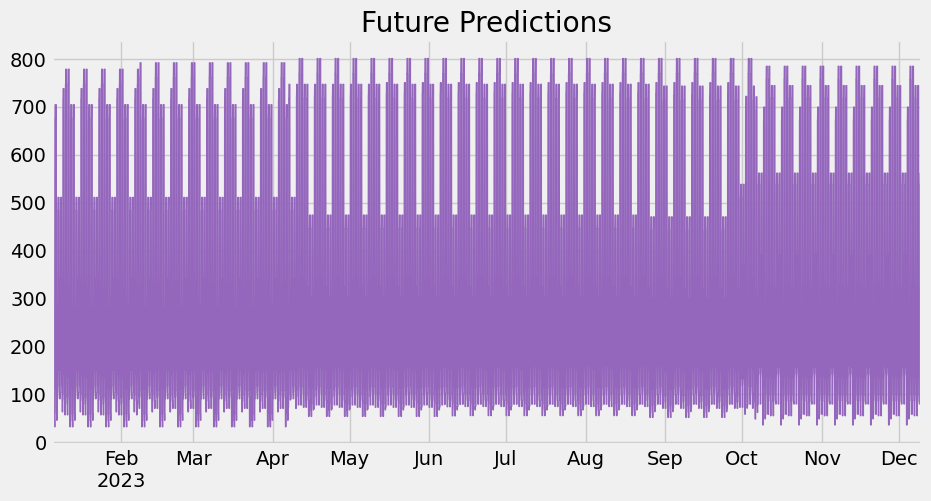

In [ ]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

In [ ]:
reg.save_model('model.json')

<Axes: title={'center': 'Future Predictions'}>

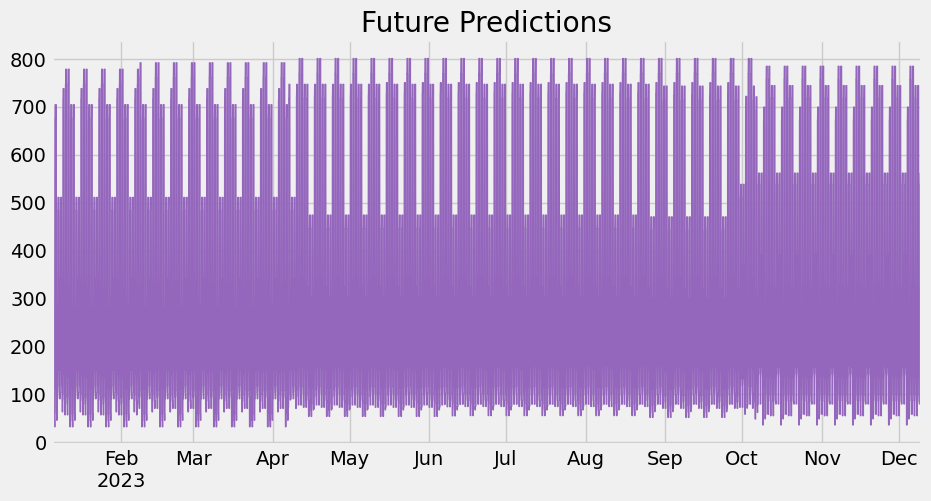

In [ ]:
reg_new = xgb.XGBRegressor()
reg_new.load_model('model.json')
future_w_features['pred'] = reg_new.predict(future_w_features[features])
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1, lw=1,
                               title='Future Predictions')